In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
iris2 = pd.read_csv("IRIS.csv")

In [3]:
iris2.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris2.shape


(150, 5)

In [5]:
x = iris2.drop(["species"], axis = 1)
y = iris2["species"]

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2)

In [7]:
x_train.shape, x_test.shape

((112, 4), (38, 4))

In [8]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
53,5.5,2.3,4.0,1.3
141,6.9,3.1,5.1,2.3
78,6.0,2.9,4.5,1.5
97,6.2,2.9,4.3,1.3
143,6.8,3.2,5.9,2.3


In [9]:
y_train.head()

53     Iris-versicolor
141     Iris-virginica
78     Iris-versicolor
97     Iris-versicolor
143     Iris-virginica
Name: species, dtype: object

1-What is Information gain?

In the simples terms, we can define information gain as the inverse of entropy. Information gain is between 0 and 1. It shows how much value can be gained from the classification results given for a given feature. For example, if the feature takes a separate value for each class, the entropy value will be 0 and the information gain will be 1. This means that a one-to-one connection can be established between the information we have and the class. On the other hand, the more independent the feature we have from the classes, information gain will be lower.

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=2)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

Overfitting refers to an unwanted behavior of a machine learning algorithm used for predictive modeling.

It is the case where model performance on the training dataset is improved at the cost of worse performance on data not seen during training, such as a holdout test dataset or new data.

To prevent overfitting, there are two ways: 1. we stop splitting the tree at some point; 2. we generate a complete tree first, and then get rid of some branches. I am going to use the 1st method. In order to stop splitting earlier, we need to introduce  maximum depth of the tree.


2-What is the gini index?

The gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.

The minimum value of the Gini Index is 0. This happens when the node is pure, this means that all the contained elements in the node are of one unique class. Therefore, this node will not be split again. Thus, the optimum split is chosen by the features with less Gini Index. Moreover, it gets the maximum value when the probability of the two classes are the same.

In [12]:
y_pred_gini = clf_gini.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9737


In [14]:
y_pred_train_gini = clf_gini.predict(x_train)



In [15]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9821


In [16]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.9821
Test set score: 0.9737


[Text(251.10000000000002, 380.52, 'X[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [34, 39, 39]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(334.8, 271.8, 'X[3] <= 1.65\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 4.95\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(502.20000000000005, 163.07999999999998, 'X[2] <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(418.5, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(585.9, 54.360000000000014, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

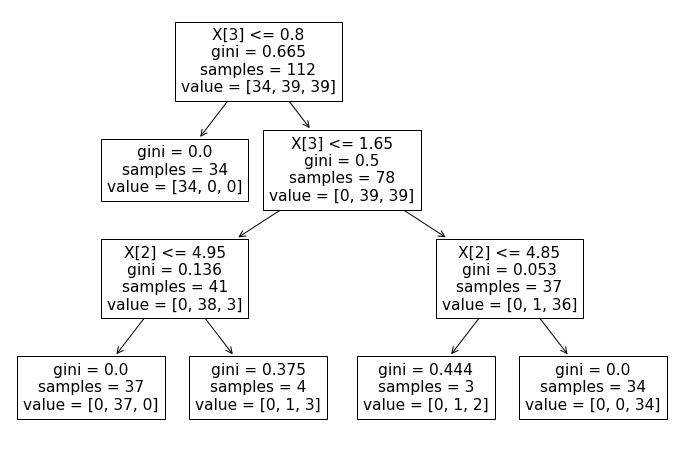

In [17]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train)) 

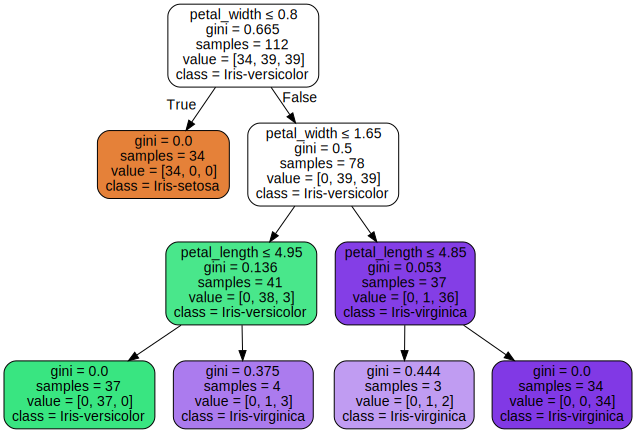

In [18]:
import graphviz 

dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=  ["sepal_length","sepal_width","petal_length","petal_width"],
                              class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"],  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]


In [20]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2)
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2)

3-What is entropy? 

Entropy is a measure of information that indicates the disorder of the features with the target. Similar to the Gini Index, the optimum split is chosen by the feature with less entropy. It gets its maximum value when the probability of the two classes is the same and a node is pure when the entropy has its minimum value, which is 0.

In [21]:
y_pred_en = clf_en.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9737


In [23]:
y_pred_train_en = clf_en.predict(x_train)


In [24]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9821


In [25]:
print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.9821
Test set score: 0.9737


[Text(251.10000000000002, 380.52, 'X[3] <= 0.8\nentropy = 1.582\nsamples = 112\nvalue = [34, 39, 39]'),
 Text(167.4, 271.8, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(334.8, 271.8, 'X[3] <= 1.65\nentropy = 1.0\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 4.95\nentropy = 0.378\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(502.20000000000005, 163.07999999999998, 'X[2] <= 4.85\nentropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(585.9, 54.360000000000014, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

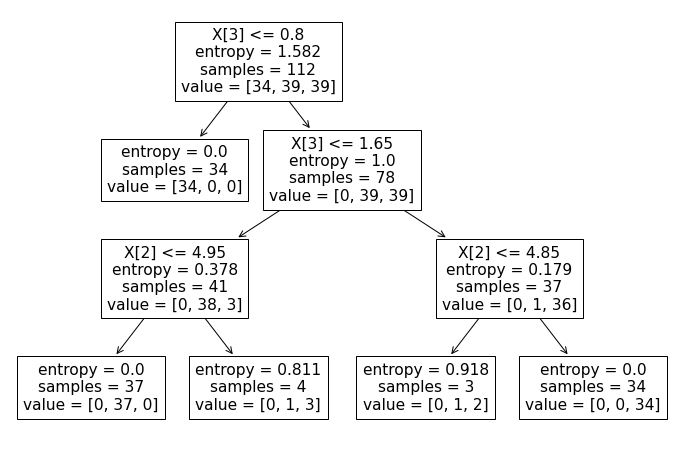

In [26]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(x_train, y_train)) 

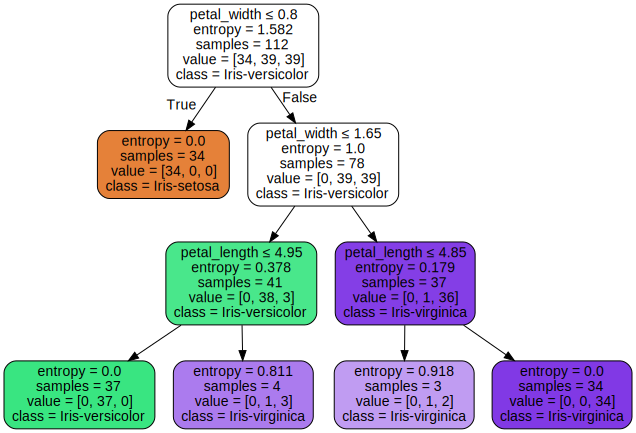

In [27]:
import graphviz 

dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=  ["sepal_length","sepal_width","petal_length","petal_width"],
                              class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"],  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]


 4-What is a confusion matrix?
 
 A confusion matrix is a table often used to describe the performance of a classification model on a set of test data for which the actual values are known. Confusion matrix is used to interpret the results of an established classification model and to examine the errors in the relationship between the actual and predicted values crosswise. For example, create a model that tries to predict whether customers are married or single from a data set. While evaluating the result of the established classification model, we can consider the positives as married and the negatives as single classes, according to the matrix. There are four parameters (TP, TN, FN, FP) that we can evaluate.

True Positive (TP) is an outcome where the model correctly predicts the positive class.

True Negative (TN) is an outcome where the model correctly predicts the negative class.

False Positive (FP) is an outcome where the model incorrectly predicts the positive class.

False Negative (FN) is an outcome where the model incorrectly predicts the negative class.


5-What is accuracy?

Model accuracy is a machine learning model performance metric that is defined as the ratio of true positives and true negatives to all positive and negative observations. In other words, accuracy tells us how often we can expect our machine learning model will correctly predict an outcome out of the total number of times it made predictions. For example: Let’s assume that you were testing your machine learning model with a dataset of 100 records and that your machine learning model predicted all 90 of those instances correctly. The accuracy metric, in this case, would be: (90/100) = 90%. The accuracy rate is great but it doesn’t tell us anything about the errors our machine learning models make on new data we haven’t seen before.
Mathematically, it represents the ratio of the sum of true positive and true negatives out of all the predictions.

Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



6-What is precision?

Model precision score represents the model’s ability to correctly predict the positives out of all the positive predictions it made. The precision score is a useful measure of the success of prediction when the classes are very imbalanced. Mathematically, it represents the ratio of true positive to the sum of true positive and false positive.

Precision Score = TP / (FP + TP)


7-What is recall?

Recall: Model recall score represents the model’s ability to correctly predict the positives out of actual positives. This is unlike precision which measures how many predictions made by models are actually positive out of all positive predictions made. For example: If your machine learning model is trying to identify positive reviews, the recall score would be what percent of those positive reviews did your machine learning model correctly predict as a positive. In other words, it measures how good our machine learning model is at identifying all actual positives out of all positives that exist within a dataset. The higher the recall score, the better the machine learning model is at identifying both positive and negative examples. Recall score is a useful measure of success of prediction when the classes are very imbalanced.  Mathematically, it represents the ratio of true positive to the sum of true positive and false negative.
Recall Score = TP / (FN + TP)


8-What is f1 score?

Model f1 score represents the model score as a function of precision and recall score. F-score is a machine learning model performance metric that gives equal weight to both the Precision and Recall for measuring its performance in terms of accuracy, making it an alternative to Accuracy metrics (it doesn’t require us to know the total number of observations). It’s often used as a single value that provides high-level information about the model’s output quality. This is a useful measure of the model in the scenarios where one tries to optimize either of precision or recall score and as a result, the model performance suffers. The following represents the aspects relating to issues with optimizing either precision or recall score.
Optimizing for recall helps with minimizing the chance of not detecting a malignant cancer. However, this comes at the cost of predicting malignant cancer in patients although the patients are healthy (a high number of FP).
Optimize for precision helps with correctness if the patient has a malignant cancer. However, this comes at the cost of missing malignant cancer more frequently (a high number of FN).
Mathematically, it can be represented as harmonic mean of precision and recall score.




References

https://machinelearningmastery.com/overfitting-machine-learning-models/
https://www.datacamp.com/community/tutorials/decision-tree-classification-python
https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/